<a href="https://colab.research.google.com/github/ragalaa/Directory/blob/master/Regression_with_Multivariate_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

NameError: ignored

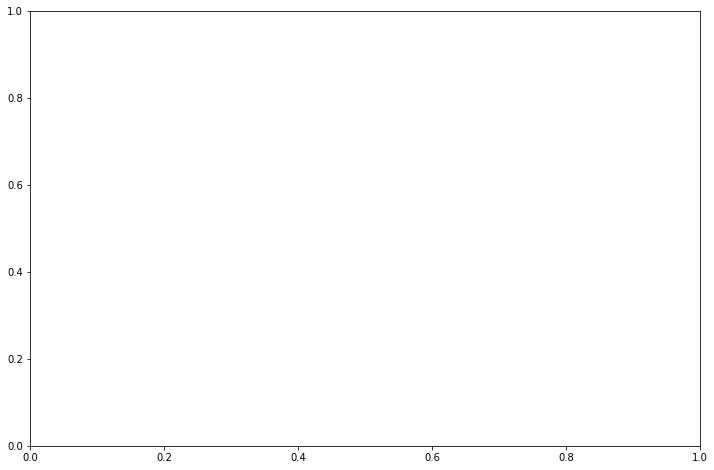

In [92]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
admission_data = pd.read_csv('GRe_score.csv')
admission_data.head()

## Logic for conditional checking
admission_data[(admission_data['GRE Score'] >= 340)].head()

### transform  Array shape Example (100,100) to Pandas dataframe

trans_frame = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                columns=['a', 'b', 'c'])
trans_frame.astype('int64')

### Concatenation of two tbales using PD.concat( table1, table2)

## Create New column 'comment'
admission_data['comment'] = ''
admission_data.head()

## Add comments in data column
# admission_data.loc[admission_data['GRE Score'] >= 340,'comment'] = 'Greater 340'
# admission_data[(admission_data['GRE Score'] >= 340)].head()
# admission_data['Quarters_isspace'] = map(lambda x: x.isspace(), admission_data['comment'])

# Kbin ddiscretizer estimator Object####

kbins = KBinsDiscretizer(n_bins=3 , encode= 'ordinal', strategy='uniform')
kbinsarr = kbins.fit_transform(admission_data[['GRE Score', 'Chance of Admit ']])
Final = pd.DataFrame(data =kbinsarr, columns = ['Binned GreScore', 'Binned Admit'])
# Final.sample(10)

Finaldata = pd.concat([admission_data, Final],axis=1)
Finaldata.sample(10) ## added two columns
Finaldata['Binned GreScore'].unique()

Categor = Finaldata['comment'].unique()
Categor

### Showing those cateores in plots with differnt Bins with different categories ###
fig, ax = plt.subplots(figsize=(12,8))
colors = {categor[0]:'Green', categor[1]:'red',categor[2]:'blue'}
ax.scatter(Finaldata['GRE Score'],Finaldata['Chance of Admit '], 
           c=Finaldata['comment'].apply(lambda x:colors[x]))
ax.set(xlabel='GRE Score', ylabel= 'Chance of Admit ', title=" performance" )
ax.grid()
# ax.set_xticks('list')
# ax.set_yticks('list')

plt.show()

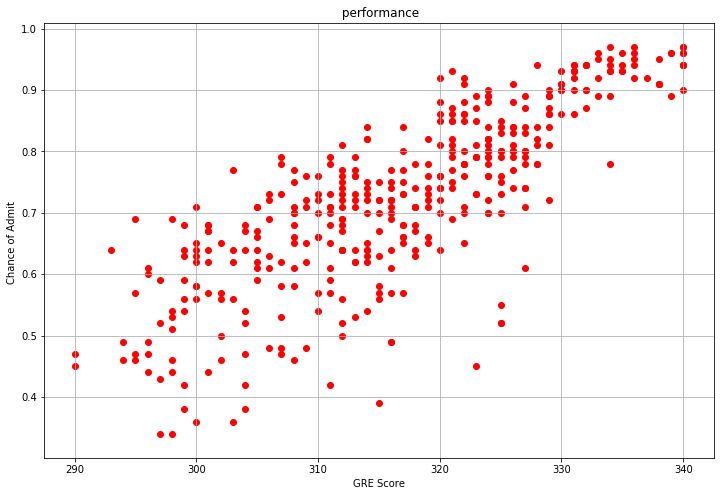

In [11]:
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(admission_data['GRE Score'], admission_data['Chance of Admit '], color= 'red')
ax.set(xlabel='GRE Score', ylabel= 'Chance of Admit ', title=" performance" )
ax.grid()
plt.show()

In [0]:
X = admission_data.drop('Chance of Admit ', axis =1)
y = admission_data['Chance of Admit ']

y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

# 80 % data to traing and 20 % to test the data size

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
x_train.shape, x_test.shape

((320, 8), (80, 8))

In [0]:
y_train.shape, y_test.shape

((320,), (80,))

In [0]:
x_trainwith_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_trainwith_intercept)
fit_model = stats_model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     163.7
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          1.17e-106
Time:                        20:56:48   Log-Likelihood:                 439.36
No. Observations:                 320   AIC:                            -860.7
Df Residuals:                     311   BIC:                            -826.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2502      0.13

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
y_pred_train = linear_model.predict(x_train)

In [0]:
from sklearn.metrics import r2_score
r2_score(y_pred_train,y_train)

0.7624837723135147

In [0]:
y_pred_test = linear_model.predict(x_test)
r2_score(y_pred_test, y_test)

0.8187452637161245

In [0]:
from scipy import stats
slope, intercept, r_value, _, _ = \
stats.linregress(admission_data['GRE Score'],admission_data['Chance of Admit '])
print('R-squarevalue', r_value**2)

R-squarevalue 0.6441835498438327


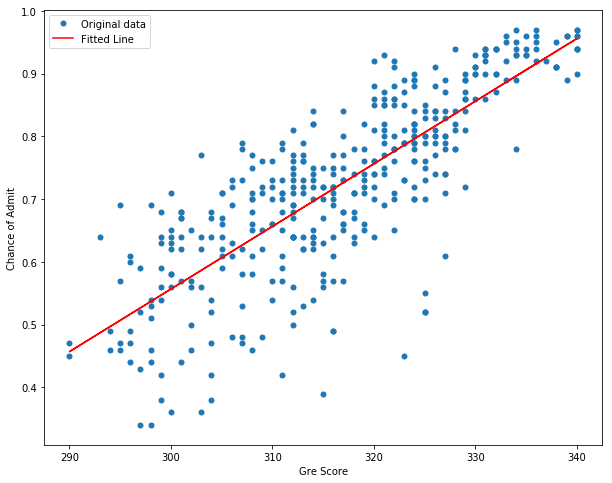

In [0]:
plt.figure(figsize=(10,8))
plt.plot(admission_data['GRE Score'],admission_data['Chance of Admit '],
        'o', label = 'Original data', markersize=5)
plt.plot(admission_data['GRE Score'], slope*admission_data['GRE Score'] + intercept, 
        'r', label = 'Fitted Line')
plt.xlabel('Gre Score')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()

# Pair wise Relationship using seaborn

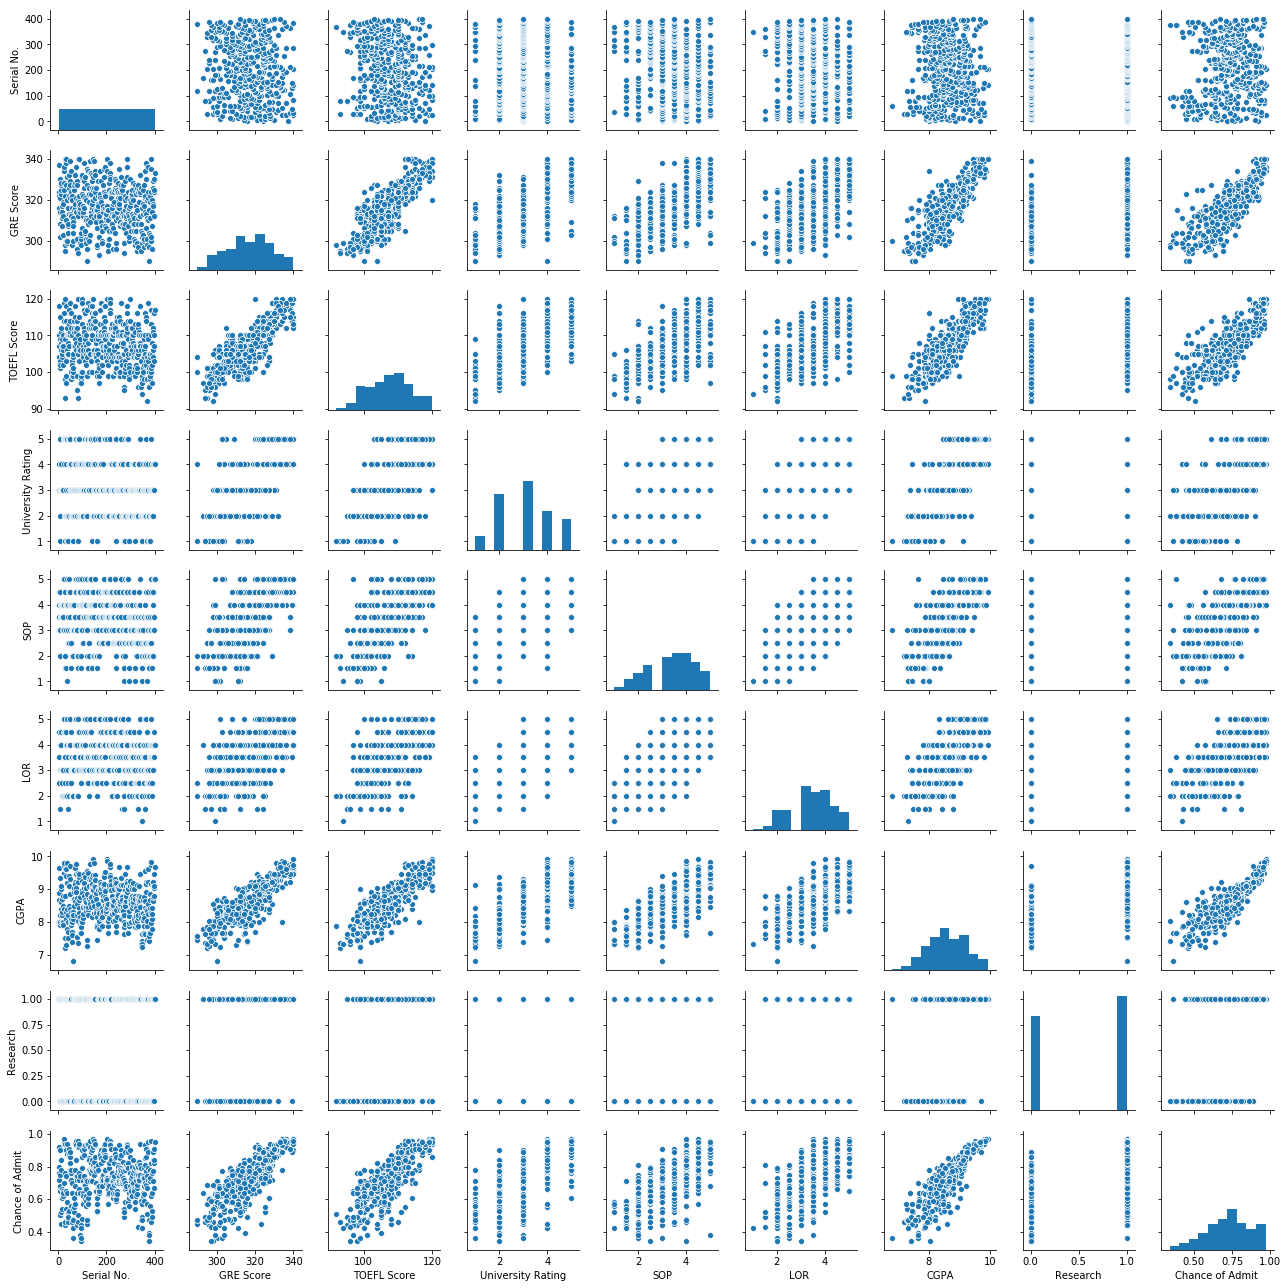

In [0]:
import seaborn as sns
sns.pairplot(admission_data, diag_kind = 'hist', height=2)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


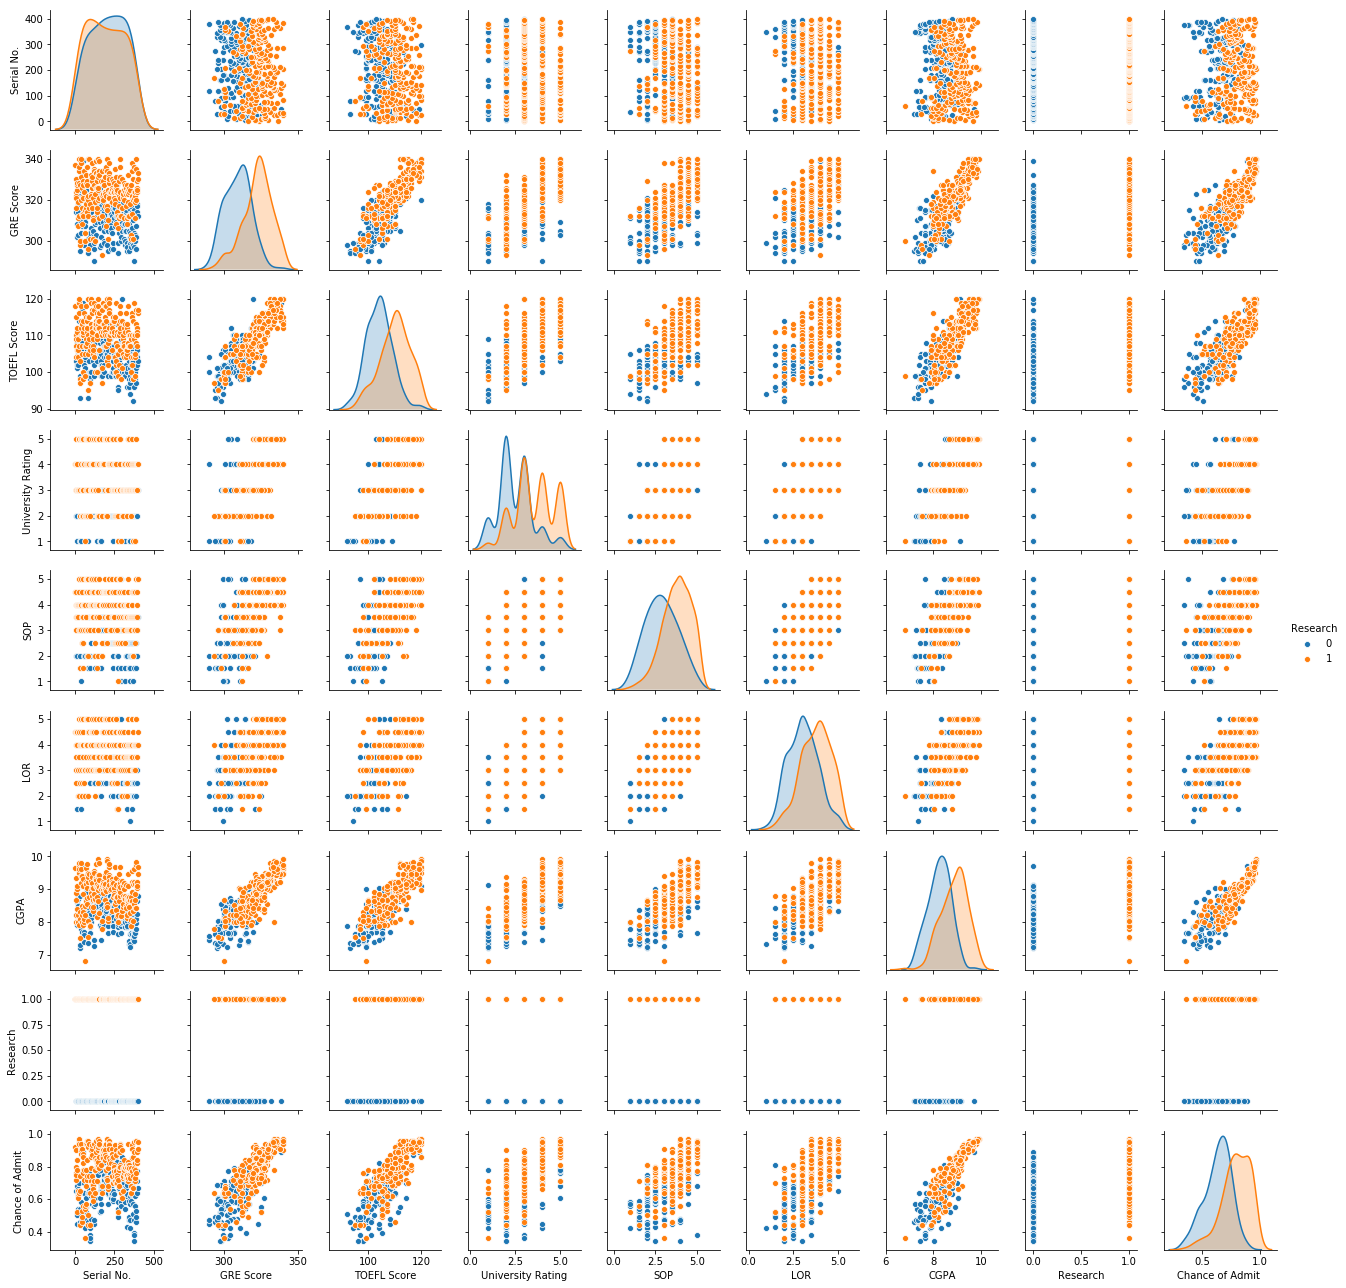

In [0]:
sns.pairplot(admission_data, hue='Research', diag_kind = 'kde', height=2)
plt.show()

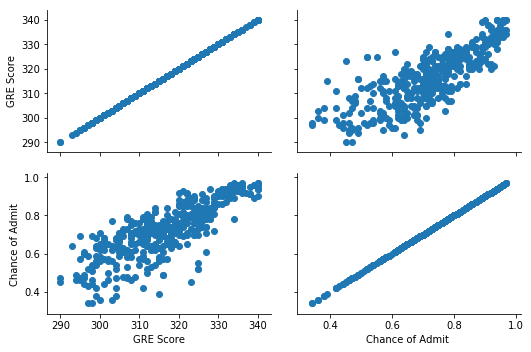

In [0]:
grid = sns.PairGrid(admission_data, vars=['GRE Score', 'Chance of Admit '], aspect=1.5)
grid.map(plt.scatter)
plt.show()




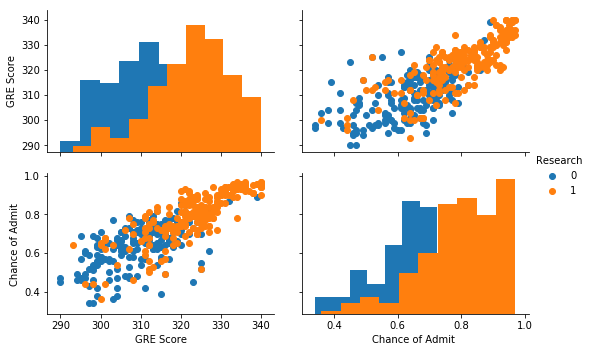

In [0]:
grid = sns.PairGrid(admission_data, vars=['GRE Score', 'Chance of Admit '], hue='Research',  aspect=1.5)
grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter)
grid.add_legend()
plt.show()


# Seaborn Box plot

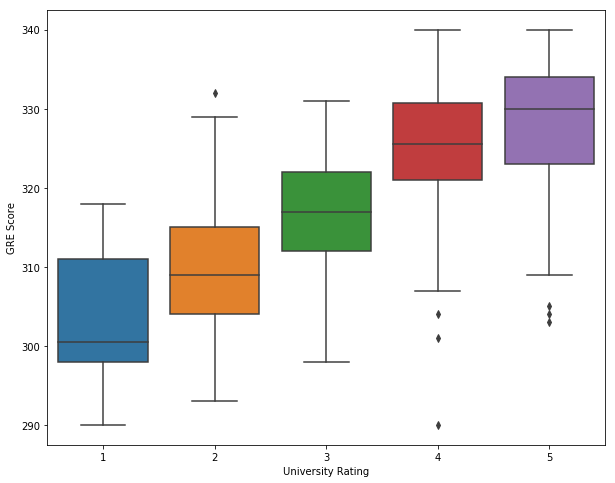

In [0]:
plt.figure( figsize= (10, 8))
sns.boxplot( x= 'University Rating', y= 'GRE Score', data = admission_data)
plt.show()

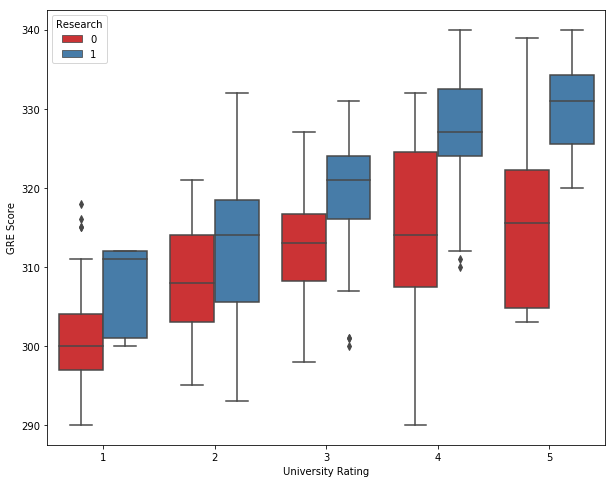

In [0]:
plt.figure( figsize= (10, 8))
sns.boxplot( x= 'University Rating', y= 'GRE Score', 
             hue= 'Research', data = admission_data,
             palette='Set1')
plt.show()

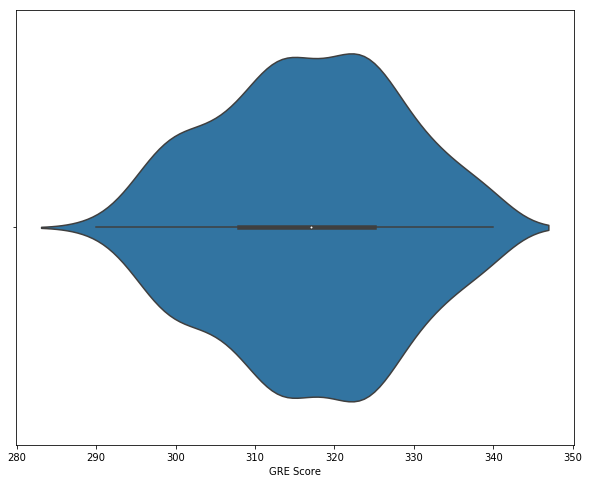

In [0]:
plt.figure( figsize= (10, 8))
sns.violinplot( x= 'GRE Score', 
              data = admission_data )
plt.show()

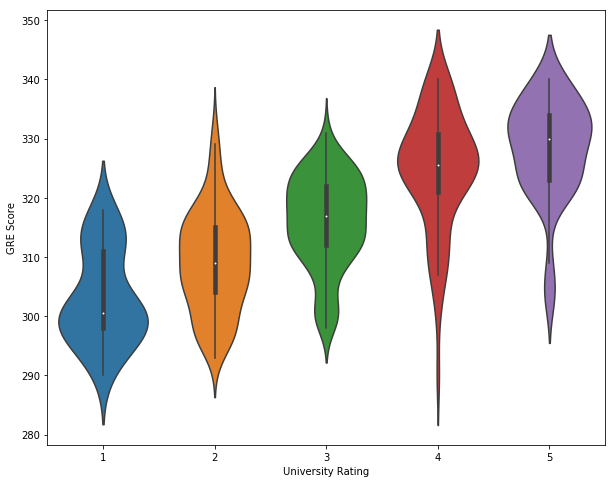

In [0]:
plt.figure( figsize= (10, 8))
sns.violinplot( x= 'University Rating', y='GRE Score', 
              data = admission_data )
plt.show()

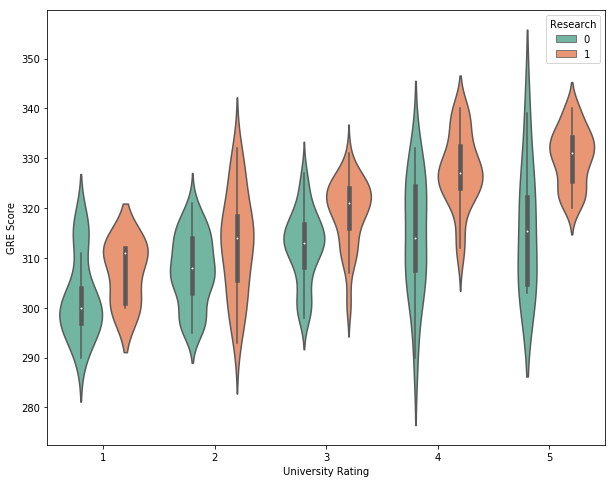

In [0]:
plt.figure( figsize= (10, 8))
sns.violinplot( x= 'University Rating', y='GRE Score', hue = 'Research',
              data = admission_data, palette='Set2' )
plt.show()

New coulumn added with cndition

In [0]:
admission_data['First Class'] = admission_data['CGPA'] >8.5
admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,First Class
0,1,337,118,4,4.5,4.5,9.65,1,0.92,True
1,2,324,107,4,4.0,4.5,8.87,1,0.76,True
2,3,316,104,3,3.0,3.5,8.00,1,0.72,False
3,4,322,110,3,3.5,2.5,8.67,1,0.80,True
4,5,314,103,2,2.0,3.0,8.21,0,0.65,False


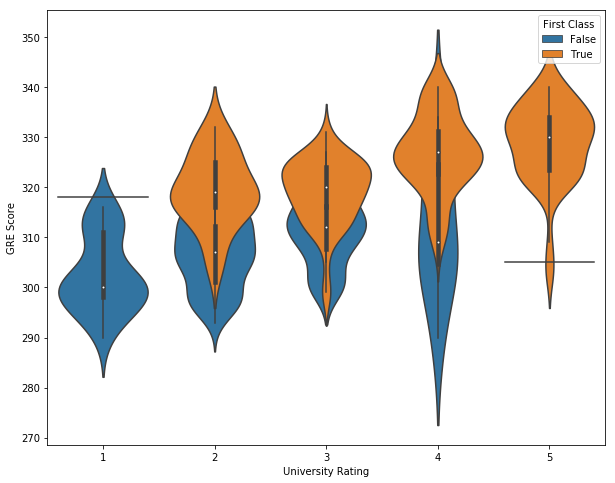

In [0]:
plt.figure( figsize= (10, 8))
sns.violinplot( x= 'University Rating', y='GRE Score', hue = 'First Class',
              data = admission_data, dodge=False )
plt.show()

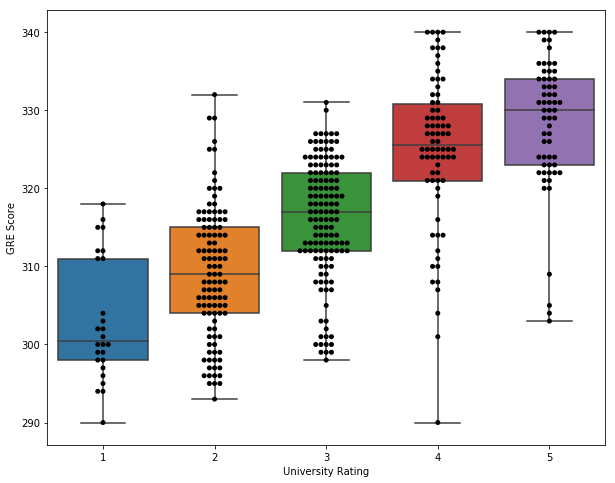

In [0]:
import numpy as np
plt.figure( figsize= (10,8))
sns.boxplot(x= 'University Rating', y='GRE Score', data = admission_data, whis= np.inf)
sns.swarmplot(x= 'University Rating', y='GRE Score',data = admission_data, color ='black' )
plt.show()

In [0]:
from sklearn.preprocessing import binarize ,Binarizer
num_list = [[-1000,0],
            [500,-3000],
            [100,650]]

In [25]:
# binarizer = Binarizer()
# Binarized_list = binarizer.transform(num_list)

# With threshold data 500

# binarizer = Binarizer( threshold=500)
# Binarized_list = binarizer.fit_transform(num_list)
# Binarized_list

### Threshold data with list [0, 100] ## o for feature(column), 100 for secnd feature
binarizer = Binarizer( threshold=[0,100])
Binarized_list = binarizer.fit_transform(num_list)
Binarized_list

array([[0, 0],
       [1, 0],
       [1, 1]])